In [1]:
# Analysis of loss of GISTIC results for LOY manuscript
# 11-08-22, manuscript revisioin
# Esther Rheinbay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42


In [4]:
fig_dir = '.'

In [5]:
GISTIC_dir = 'GISTIC_male_tumors'

# Exclude BRCA (too few cases) and BLCA (no Yq results)
tumor_types = sorted(['ACC','BLCA', 'MESO','PAAD','PCPG','PRAD','CHOL','READ','COAD','SARC','DLBC','SKCM','ESCA','STAD','GBM','TGCT','HNSC','THCA','KICH','THYM','KIRC','KIRP','UVM','LAML','LGG','LIHC','LUAD','LUSC'])

In [6]:
# Load hg19 chromosome sizes, from UCSC
chr_sizes = pd.read_csv('hg19.noChr.sizes', sep='\t', header=None, index_col = 0)

# calculate chromosome arm sizes from cytobands file from UCSC
cytobands = pd.read_csv('cytoBand.txt', sep='\t', header=None, names = ['chr', 'start', 'end', 'band', 'giemsa'])
cytobands['length'] = cytobands.apply(lambda x: x.end -x.start, axis=1)
cytobands['arm'] = cytobands.apply(lambda x: x.band[0], axis=1)
arms = cytobands.groupby(['chr', 'arm'])['length'].sum()
arms.index = [''.join(x).replace('chr', '') for x in arms.index.to_flat_index()]



posx and posy should be finite values
posx and posy should be finite values


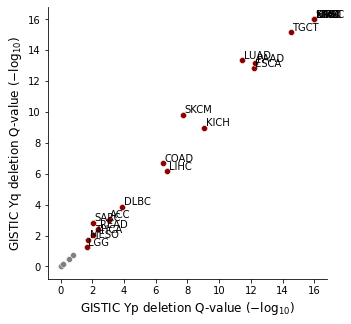

In [8]:
# Figure 2B
# use only Yp because we already show above that Yp and Yq are very strongly correlated


Yp_del_freq_df = pd.DataFrame(index = tumor_types, columns= ['Del frequency', 'Del z-score', 'Del q-value'], dtype="float")
Yq_del_freq_df = pd.DataFrame(index = tumor_types, columns= ['Del frequency', 'Del z-score', 'Del q-value'], dtype="float")

for t in tumor_types:
    gistic_freqs = pd.read_csv(GISTIC_dir + '/' + t + '/broad_significance_results.txt', sep='\t', header=0, index_col=0)
    gistic_freqs['Del q-value'].replace(0, 1e-16, inplace=True)
    Yp_del_freq_df.loc[t][['Del frequency', 'Del z-score', 'Del q-value']]=gistic_freqs.loc['Yp'][['Del frequency', 'Del z-score', 'Del q-value']]
    if 'Yq' in gistic_freqs.index:
        Yq_del_freq_df.loc[t][['Del frequency', 'Del z-score', 'Del q-value']]=gistic_freqs.loc['Yq'][['Del frequency', 'Del z-score', 'Del q-value']]

        
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(x = -np.log10(Yp_del_freq_df['Del q-value']), y = -np.log10(Yq_del_freq_df['Del q-value']), color='grey')
sns.scatterplot(x = -np.log10(Yp_del_freq_df[Yp_del_freq_df['Del q-value']<0.1]['Del q-value']), y = -np.log10(Yq_del_freq_df[Yq_del_freq_df['Del q-value']<0.1]['Del q-value']),  color='darkred')
for index, row in Yp_del_freq_df[Yp_del_freq_df['Del q-value']<0.1].iterrows():
    ax.text(-np.log10(row['Del q-value'])+0.1, -np.log10(Yq_del_freq_df.loc[index]['Del q-value'])+0.1, index)
ax.set_xlabel('GISTIC Yp deletion Q-value ($\mathregular{-log_{10}}$)',fontsize=12) 
ax.set_ylabel('GISTIC Yq deletion Q-value ($\mathregular{-log_{10}}$)',fontsize=12) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.savefig(fig_dir + 'GISTIC_arm_level_Yp_Yq_scatter.pdf')


<h3> GISTIC Yp deletion frequency vs deletion z-score </h3>

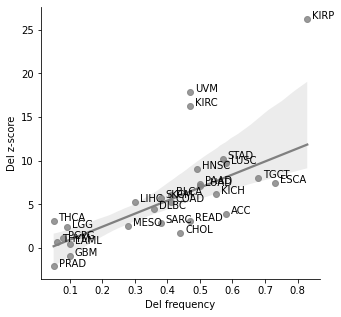

In [31]:
# Figure 2F
# Z-score vs Y deletion freuqency for only Yp (since Y p and Yq are highly correlated)

fig, ax = plt.subplots(1,1, figsize = (5,5))

# fit regression line robust to outliers
sns.regplot(x = 'Del frequency', y = 'Del z-score', data = Yp_del_freq_df, color='grey', robust=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


for index, row in Yp_del_freq_df.iterrows():
        ax.text(row['Del frequency']+ 0.015, row['Del z-score']+0.01, index)

plt.savefig(fig_dir + 'GISTIC_del_freq_vs_del_zscore_all_ttypes.pdf')

<h3> Number of genes on chromosome vs. deletion frequency (see Beroukhim et al, Nature, 2010) </h3>

/Users/esther/opt/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/var/folders/z1/t63vz71n5ps4pfkvv_xq061r0000gq/T/ipykernel_85003/443365505.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize = (4,5))


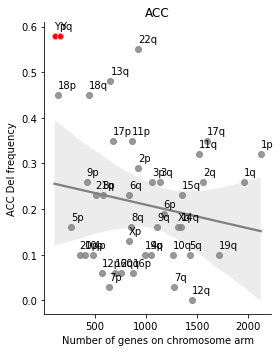

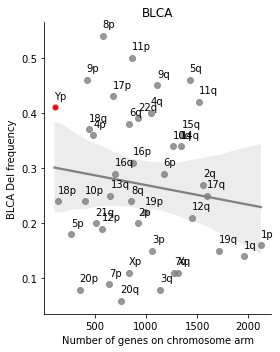

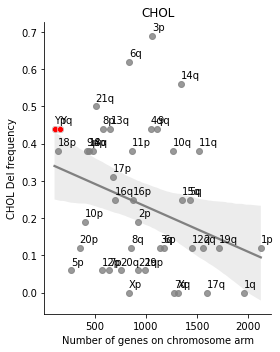

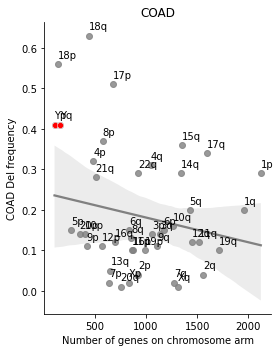

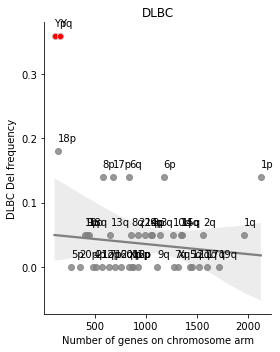

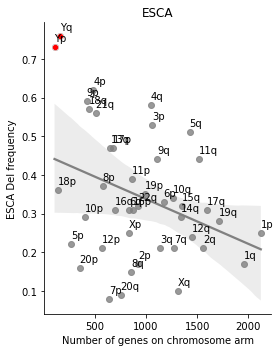

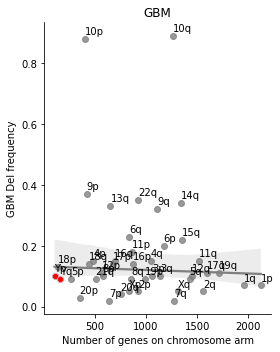

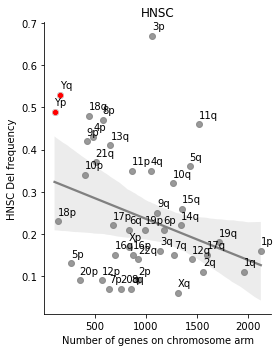

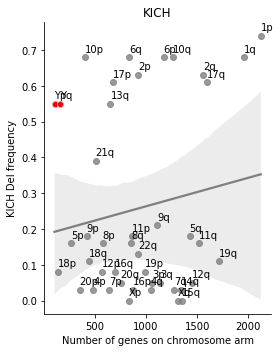

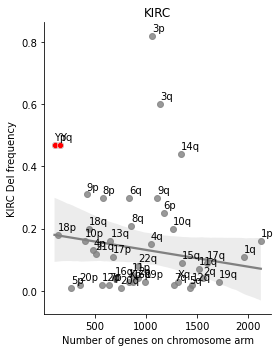

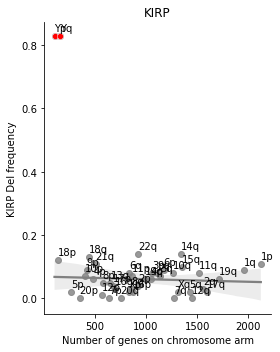

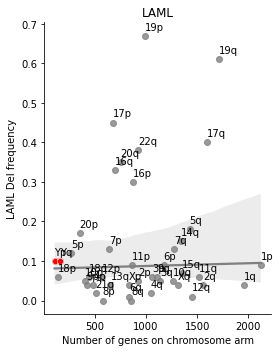

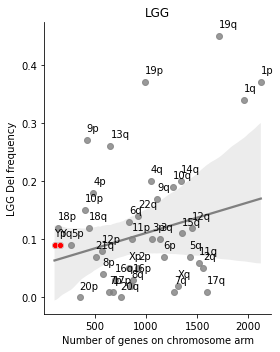

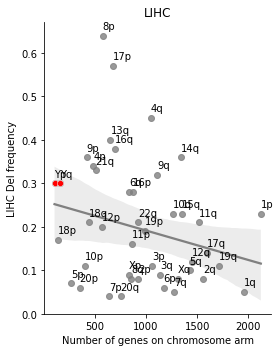

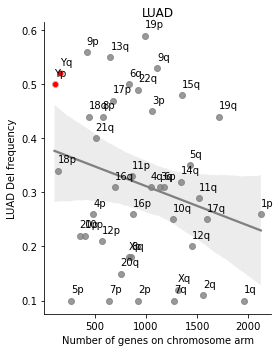

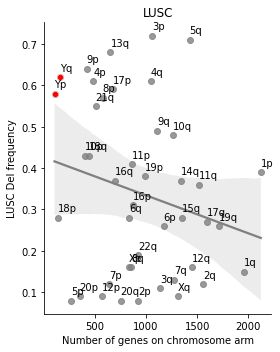

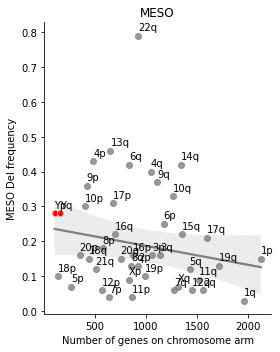

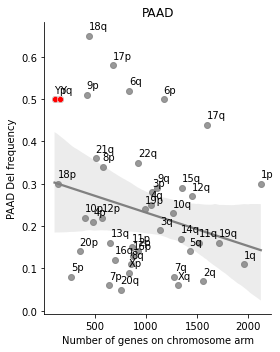

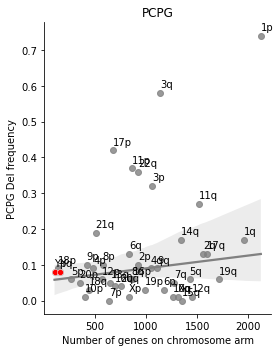

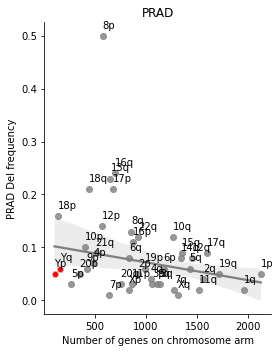

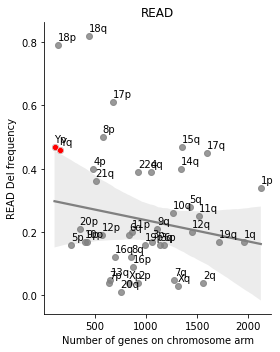

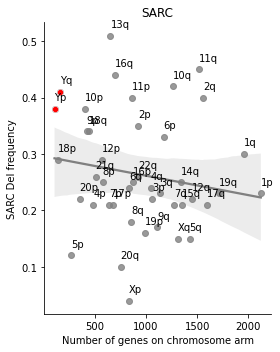

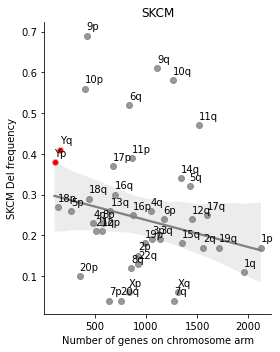

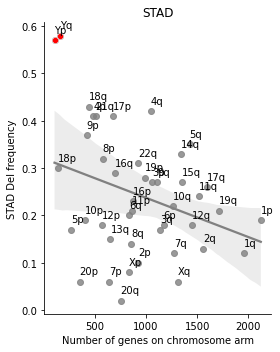

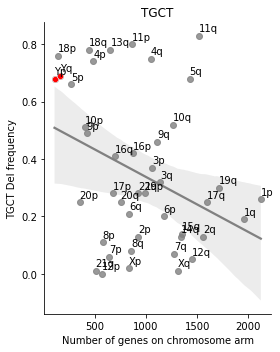

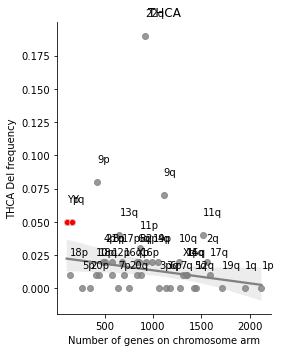

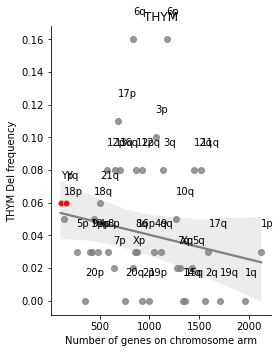

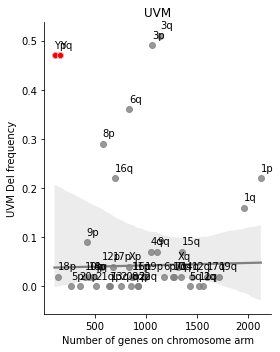

In [9]:
# Figure 2G
# for each tumor type, plot chromosome arm loss frequency vs number of genes on arm to test whether they are correlated

for t in tumor_types:
    gistic_freqs = pd.read_csv(GISTIC_dir + '/' + t + '/broad_significance_results.txt', sep='\t', header=0, index_col=0)
    fig, ax = plt.subplots(1,1, figsize = (4,5))
    sns.regplot(x = '# Genes', y = 'Del frequency', data = gistic_freqs, color='grey', robust=True)
    sns.scatterplot(x = '# Genes', y = 'Del frequency', data = gistic_freqs.loc[[x for x in gistic_freqs.index if x.startswith('Y')]], color='red')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('Number of genes on chromosome arm')
    ax.set_ylabel(t + ' Del frequency')
    ax.set_title(t)
    for index, row in gistic_freqs.iterrows():
           ax.text(row['# Genes']+0.015, row['Del frequency']+0.015, index)
    plt.tight_layout()
    plt.savefig(fig_dir + '/num_genes/' + t + '_del_freq_num_genes.pdf')
    